In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [2]:
workbook = xlrd.open_workbook('Input_val.xlsx')
D_worksheet = workbook.sheet_by_name('Data_2')

In [3]:
workbook = xlrd.open_workbook('Input_val.xlsx')
D_worksheet = workbook.sheet_by_name('Danfoss_24_220')
t = array(D_worksheet.col_values(0))
mf = array(D_worksheet.col_values(1))
pu = array(D_worksheet.col_values(2))
pd = array(D_worksheet.col_values(3))

In [4]:
f_aq = (len(t)-1)/(t[len(t)-1] - t[0])
f = 0.5
T = 1/f
N = np.int(np.floor((t[len(t)-1] - t[0])/T))
N_c = np.int(np.floor((len(t)-1)/N))

In [5]:
Pressure = np.zeros([N,N_c])
A = []
for j in range(len(pd)-2):
    if pd[j] < 1.12 and pd[j+2]-pd[j]>0.2 and pd[j-1] < 1.12:
        A.append(j)

In [6]:
for i in range(len(A)-1):
    print(A[i+1]-A[i])
    if (A[i+1]-A[i])> 150:
        print(i)

150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
150
1
149
1
149
1
149
1
149
1
149
1
149
1
149
1
149
1


In [7]:
Pressure_op =  [[] for i in range(len(A))]
Time_op =  [[] for i in range(len(A))]

Pressure_cl =  [[] for i in range(len(A))]
Time_cl =  [[] for i in range(len(A))]



for i in range(len(A)-1):
    Pressure_op[i].append(pd[A[i]:A[i]+38]-1)
    Time_op[i].append(t[A[i]:A[i]+38]-t[A[i]])
    
    Pressure_cl[i].append(pd[A[i]+38:A[i+1]]-1)
    Time_cl[i].append(t[A[i]+38:A[i+1]]-t[A[i]]-0.5)

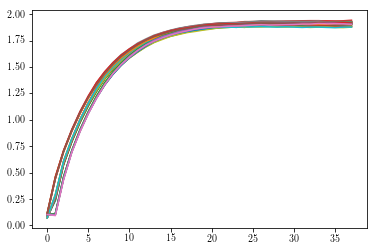

In [8]:
for i in range(len(A)-1):
    plt.plot(Pressure_op[i][0])
    #if max(Pressure_op[i][0])<0.5:
        #print(i)

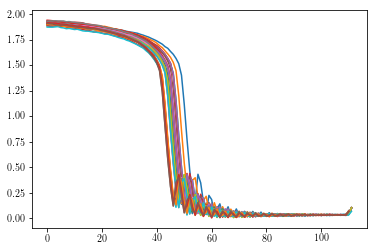

In [9]:
for i in range(len(A)-1):
    plt.plot(Pressure_cl[i][0])
    #if max(Pressure_cl[i][0])<0.5:
        #print(i)

In [10]:
I = np.ones(100)
I[0:25] = 3 
t = np.arange(0,2.0,0.02)

In [429]:
time = np.arange(0,0.5,0.01)
time_cl = np.arange(0.5,2,0.01)

In [430]:
import xlsxwriter

workbook = xlsxwriter.Workbook('Valve_Results_Danfos_24_220.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(A)-1):
    for j in range(len(Pressure_op[i][0])):
        Data.write(j,i,Pressure_op[i][0][j])

Data = workbook.add_worksheet('Data_Close')

for i in range(len(A)-1):
    for j in range(len(Pressure_cl[i][0])):
        Data.write(j,i,Pressure_cl[i][0][j])
workbook.close()

In [394]:
Time_op[1][0]

array([0.   , 0.014, 0.028, 0.04 , 0.054, 0.068, 0.081, 0.094, 0.108,
       0.12 , 0.134, 0.148, 0.16 , 0.174, 0.187, 0.201, 0.214, 0.228,
       0.24 , 0.254, 0.268, 0.28 , 0.294, 0.308, 0.32 , 0.334, 0.348,
       0.36 , 0.374, 0.388, 0.4  , 0.414, 0.428, 0.44 , 0.455, 0.468,
       0.48 , 0.494])

In [11]:
P_mean_op =  [[] for i in range(8)]
workbook = xlrd.open_workbook('Valve_Results_Mean.xlsx')
Mean_worksheet = workbook.sheet_by_name('Data')
P_mean_op[0] = array(Mean_worksheet.col_values(0))
P_mean_op[1] = array(Mean_worksheet.col_values(1))
P_mean_op[2] = array(Mean_worksheet.col_values(2))
P_mean_op[3] = array(Mean_worksheet.col_values(3))
P_mean_op[4] = array(Mean_worksheet.col_values(4))
P_mean_op[5] = array(Mean_worksheet.col_values(5))
P_mean_op[6] = array(Mean_worksheet.col_values(6))
P_mean_op[7] = array(Mean_worksheet.col_values(7))

In [12]:
P_mean_cl =  [[] for i in range(8)]
workbook = xlrd.open_workbook('Valve_Results_Mean.xlsx')
Mean_worksheet = workbook.sheet_by_name('Data_Close')
for i in range(8):
    P_mean_cl[i] = array(Mean_worksheet.col_values(i))

In [13]:
Time_cl[1][0]

array([0.008, 0.02 , 0.034, 0.048, 0.06 , 0.074, 0.087, 0.1  , 0.114,
       0.128, 0.14 , 0.154, 0.168, 0.18 , 0.194, 0.208, 0.22 , 0.234,
       0.248, 0.26 , 0.274, 0.288, 0.3  , 0.315, 0.328, 0.34 , 0.355,
       0.367, 0.381, 0.394, 0.408, 0.42 , 0.434, 0.448, 0.46 , 0.474,
       0.488, 0.5  , 0.515, 0.527, 0.54 , 0.555, 0.567, 0.581, 0.595,
       0.607, 0.621, 0.635, 0.648, 0.66 , 0.674, 0.688, 0.7  , 0.714,
       0.728, 0.74 , 0.754, 0.768, 0.781, 0.795, 0.807, 0.821, 0.835,
       0.847, 0.86 , 0.874, 0.888, 0.9  , 0.915, 0.928, 0.94 , 0.954,
       0.968, 0.98 , 0.994, 1.008, 1.02 , 1.034, 1.048, 1.06 , 1.074,
       1.088, 1.1  , 1.114, 1.128, 1.14 , 1.154, 1.168, 1.18 , 1.195,
       1.208, 1.22 , 1.234, 1.248, 1.26 , 1.274, 1.288, 1.301, 1.315,
       1.328, 1.34 , 1.354, 1.368, 1.38 , 1.394, 1.408, 1.42 , 1.435,
       1.447, 1.461, 1.475, 1.487])

In [14]:
Valve = ['Asco - 24 V','Asco - 220 V','Danfoss 24 - 24 V','Danfoss 24 - 220 V','Danfoss 51 - 24 V','Danfoss 51 - 220 V','Danfoss 56 - 24 V','Danfoss 56 - 220V']

In [15]:
time_op = np.arange(0,0.5,0.5/38)

Text(0.5, 0, 'Time [s]')

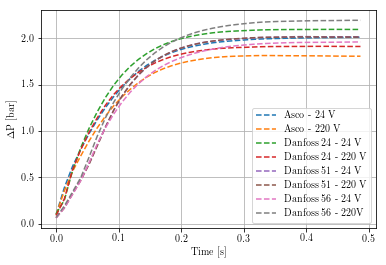

In [16]:
for i in range(8):
    plt.plot(time_op,P_mean_op[i],'--',label = Valve[i])
plt.legend()
plt.grid()
plt.ylabel('$\Delta$P [bar]')
plt.xlabel('Time [s]')
#plt.savefig('Valve_open.png',format = 'png', dpi=1000,bbox_inches='tight')

In [17]:
time_cl = np.arange(0.5,2,1.5/112)

Text(0.5, 0, 'Time [s]')

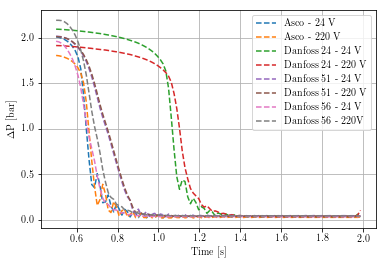

In [18]:
for i in range(8):
        plt.plot(time_cl,P_mean_cl[i],'--',label = Valve[i])
plt.legend()
plt.grid()
plt.ylabel('$\Delta$P [bar]')
plt.xlabel('Time [s]')
#plt.savefig('Valve_close.png',format = 'png', dpi=1000,bbox_inches='tight')

In [19]:
P_mean_op[0][38]/np.max(P_mean_op[0])

IndexError: index 38 is out of bounds for axis 0 with size 38

In [53]:
j = 7

(P_mean_cl[i][j])/np.min(P_mean_cl[j])

In [54]:
lim_op = 0
i = 0
while P_mean_op[j][i]/np.max(P_mean_op[j]) < 0.99:
    i = i+1
    
lim_op = i

lim_cl = 0

i = 0
#while float(P_mean_cl[j][i])/np.max(P_mean_cl[j]) > 1:
    #i = i+1

#lim_cl = i
lim_cl = 0
i=0
while float(P_mean_cl[j][i])/np.min(P_mean_cl[j]) > 1.01:
    i = i+1

lim_cl_f = i

lim_op,lim_cl,lim_cl_f

(25, 0, 45)

In [55]:
Time_op[j][0][lim_op],Time_cl[j][0][lim_cl_f]

(0.33200000000000074, 0.6060000000000016)

In [56]:
T_op.append(Time_op[j][0][lim_op])
T_cl.append(Time_cl[j][0][lim_cl_f])

T_op = []
T_cl = []

In [57]:
Val = np.arange(1,9,1)

In [58]:
Val

array([1, 2, 3, 4, 5, 6, 7, 8])

Text(0.5, 0, 'Valve [-]')

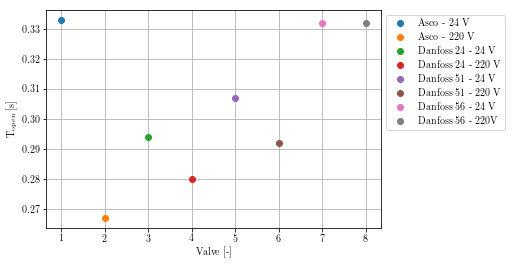

In [59]:
for i in range(8):
    plt.plot(Val[i],T_op[i],'o',label = Valve[i])
plt.grid()
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('T$_\mathrm{open}$ [s]')
plt.xlabel('Valve [-]')
#plt.savefig('T_open.png',format = 'png', dpi=1000,bbox_inches='tight')

Text(0.5, 0, 'Valve [-]')

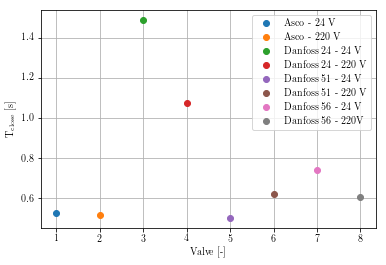

In [60]:
for i in range(8):
    plt.plot(Val[i],T_cl[i],'o',label = Valve[i])
plt.grid()
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('T$_\mathrm{close}$ [s]')
plt.xlabel('Valve [-]')
#plt.savefig('T_close.png',format = 'png', dpi=1000,bbox_inches='tight')

Text(0.5, 0, 'Valve [-]')

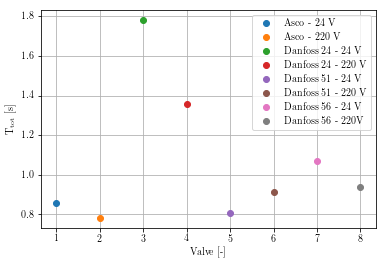

In [62]:
for i in range(8):
    plt.plot(Val[i],T_op[i] + T_cl[i],'o',label = Valve[i])
plt.grid()
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('T$_\mathrm{tot}$ [s]')
plt.xlabel('Valve [-]')
#plt.savefig('T_total.png',format = 'png', dpi=1000,bbox_inches='tight')

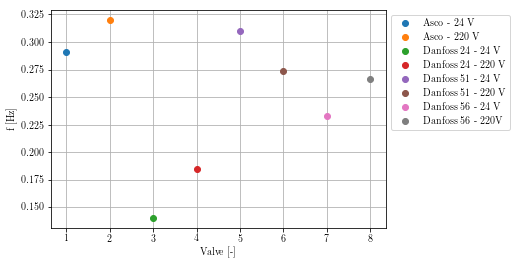

In [93]:
for i in range(8):
    plt.plot(Val[i],0.25/(T_op[i] + T_cl[i]),'o',label = Valve[i])
plt.grid()
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('f [Hz]')
plt.xlabel('Valve [-]')
plt.savefig('f_inst.png',format = 'png', dpi=1000,bbox_inches='tight')

T_op = []
T_cl = []

In [64]:
def Open(X,a,b,c): 
    t = X
    return(a*(1-b*np.exp(c*t)))

In [65]:
def Close(X,a,b,c,d): 
    t = X
    return((a*b+c*t**d)/(b+t**d))

In [66]:
time_op[0:lim_op[j]]

TypeError: 'int' object is not subscriptable

In [67]:
#j = 7

Op = np.zeros([8,4])
Cl = np.zeros([8,4])
l_op = np.zeros(8)
l_cl_f = np.zeros(8)
Fat = np.zeros(8)

for j in range(8):
    lim_op = 0
    i = 0
    while P_mean_op[j][i]/np.max(P_mean_op[j]) < 0.99:
        i = i+1

    lim_op = i
    l_op[j] = i

    lim_cl = 0
    i=0

    while float(P_mean_cl[j][i])/np.min(P_mean_cl[j]) > 1.01:
        i = i+1

    lim_cl_f = i
    l_cl_f[j] = i
    
    DM = curve_fit(Close,(time_op[0:lim_op]),P_mean_op[j][0:lim_op]/(P_mean_op[j][lim_op]-P_mean_op[j][0]),maxfev = 10000000)
    CM = curve_fit(Close,(time_cl[lim_cl:lim_cl_f]),P_mean_cl[j][lim_cl:lim_cl_f]/(P_mean_cl[j][lim_cl]-P_mean_cl[j][lim_cl_f]),maxfev = 100000000)
    
    Op[j][0] = DM[0][0]
    Op[j][1] = DM[0][1]
    Op[j][2] = DM[0][2]
    Op[j][3] = DM[0][3]
    
    Cl[j][0] = CM[0][0]
    Cl[j][1] = CM[0][1]
    Cl[j][2] = CM[0][2]
    Cl[j][3] = CM[0][3] 

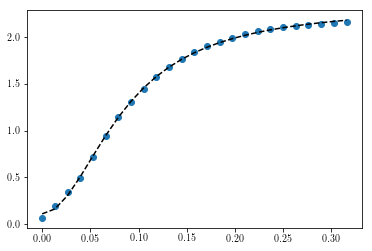

In [68]:
plt.plot(time_op[0:lim_op],P_mean_op[j][0:lim_op],'o')
plt.plot(time_op[0:lim_op],(P_mean_op[j][lim_op]-P_mean_op[j][0])*Close((time_op[0:lim_op]),DM[0][0],DM[0][1],DM[0][2],DM[0][3]),'k--')

Text(0.5, 0, 'Time [s]')

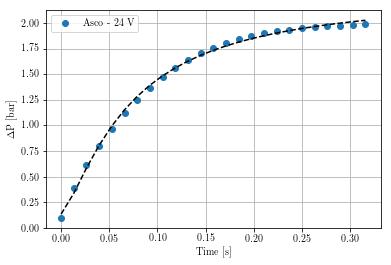

In [69]:
#for j in range(7):
j=0
lim_op = np.int(l_op[j])

plt.plot(time_op[0:lim_op],P_mean_op[j][0:lim_op],'o',label = Valve[j])
plt.plot(time_op[0:lim_op],(P_mean_op[j][lim_op]-P_mean_op[j][0])*Close((time_op[0:lim_op]),Op[j][0],Op[j][1],Op[j][2],Op[j][3]),'k--')
plt.legend()
plt.grid()
plt.ylabel('$\Delta$P [bar]')
plt.xlabel('Time [s]')
#plt.savefig('Valve_open_num.png',format = 'png', dpi=1000,bbox_inches='tight')

In [70]:
Fat = np.ones(8)
for j in range(8):
    Fat[j] = P_mean_cl[j][0]/((P_mean_cl[j][lim_cl]-P_mean_cl[j][lim_cl_f])*Close((time_cl[0]),Cl[j][0],Cl[j][1],Cl[j][2],Cl[j][3]))
Fat

array([1.00432796, 1.01692839, 1.21319559, 2.14069326, 1.00260118,
       1.00683862, 1.005879  , 0.99861323])

Text(0.5, 0, 'Time [s]')

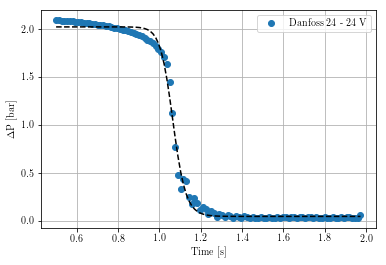

In [71]:
j=2
lim_cl = 0
lim_cl_f = np.int(l_cl_f[j])
plt.plot(time_cl[lim_cl:lim_cl_f],P_mean_cl[j][lim_cl:lim_cl_f],'o',label = Valve[j])
#plt.plot(time_op[0:lim_op],(P_mean_op[j][lim_op]-P_mean_op[j][0])*Close((time_op[0:lim_op]),Op[j][0],Op[j][1],Op[j][2],Op[j][3]),'k--')
plt.plot(time_cl[lim_cl:lim_cl_f],(P_mean_cl[j][lim_cl]-P_mean_cl[j][lim_cl_f])*Close((time_cl[lim_cl:lim_cl_f]),Cl[j][0],Cl[j][1],Cl[j][2],Cl[j][3]),'k--')
plt.legend()
plt.grid()
plt.ylabel('$\Delta$P [bar]')
plt.xlabel('Time [s]')
#plt.savefig('Valve_close_num.png',format = 'png', dpi=1000,bbox_inches='tight')

In [72]:
def Open(X,a,b,c): 
    t = X
    return(a*(1-b*np.exp(c*t)))

def Close(X,a,b,c,d): 
    t = X
    return((a*b+c*t**d)/(b+t**d))





def Perfil(f_v,DC,Esc,j):
    
    Tau = 1/f_v
    Tau_on = Tau*DC
    
    t_on = np.arange(0,Tau_on,Tau/101)
    t_off = np.arange(0,Tau-Tau_on,Tau/101)
    
    
    Pres = np.zeros(len(t_on)+len(t_off))
    B = 0
    for i in range(len(t_on)):
        if t_on[i] < time_op[np.int(l_op[j])]:
            Pres[i] = Esc*(P_mean_op[j][lim_op]-P_mean_op[j][0])*Close((t_on[i]),Op[j][0],Op[j][1],Op[j][2],Op[j][3])
        else:
            Pres[i] = Pres[i-1]
            B = 1
    if B ==0:
        print('erro')
    A = i
    
    for i in range(0,len(t_off)):
        if t_off[i] < time_cl[np.int(l_cl_f[j])]-0.5:
            Pres[i+A] = Pres[A]*Close((t_off[i])+0.5,Cl[j][0],Cl[j][1],Cl[j][2],Cl[j][3])
        else:
            Pres[i+A] = 0*Pres[i+A-1]
    Pres[len(Pres)-1] = Pres[len(Pres)-2]
    
    return (Pres,B)

In [73]:
time_cl[np.int(l_cl_f[0])],T_cl[0]+0.5

(1.0223214285714266, 1.0259999999999998)

In [74]:
time_cl[np.int(l_cl_f[j])]

1.9866071428571375

In [75]:
f_v = 0.5
t = np.arange(0,1/f_v,1/(f_v*102))
DC = 0.25
Esc = 1
j = 0
A = Perfil(f_v,DC,Esc,j)

In [76]:
time_cl[np.int(l_cl_f[0])]

1.0223214285714266

In [82]:
P_mean_op[j]C

SyntaxError: invalid syntax (<ipython-input-82-bb24940dc38e>, line 1)

Text(0.5, 0, 'Time [s]')

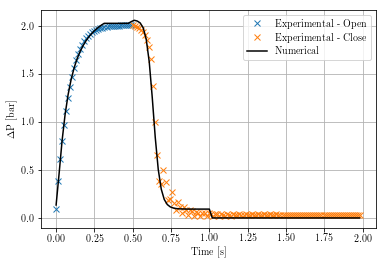

In [83]:
j = 0
C = Perfil(f_v,0.25,Esc,j)

plt.plot(time_op,P_mean_op[j],'x',label = 'Experimental - Open')
plt.plot(time_cl,P_mean_cl[j],'x',label = 'Experimental - Close')

#plt.plot(t,A,'k-',label = 'Numerical')
plt.plot(t,C[0],'k-',label = 'Numerical')
plt.legend()
plt.grid()
plt.ylabel('$\Delta$P [bar]')
plt.xlabel('Time [s]')

#plt.savefig('Numerical_5.png',format = 'png', dpi=1000,bbox_inches='tight')

In [84]:
DC = np.arange(0.1,0.25,0.01)

In [85]:
DC = np.arange(0.14,0.25,0.01)
f_v = 0.5
t = np.arange(0,1/f_v,1/(f_v*102))
Esc = 1

In [86]:
Pres

NameError: name 'Pres' is not defined

In [87]:
Pres = np.zeros([8,len(t)])

for j in range(8):
    i=0
    B = 0
    while B == 0:
        [A,B] = Perfil(f_v,DC[i],Esc,j)
        i = i+1
    print(DC[i],j)
    for i in range(len(t)):
        Pres[j][i] = A[i]
 

erro
erro
erro
0.18000000000000005 0
0.15000000000000002 1
erro
0.16000000000000003 2
0.15000000000000002 3
erro
erro
0.17000000000000004 4
erro
0.16000000000000003 5
erro
erro
erro
0.18000000000000005 6
erro
erro
erro
0.18000000000000005 7


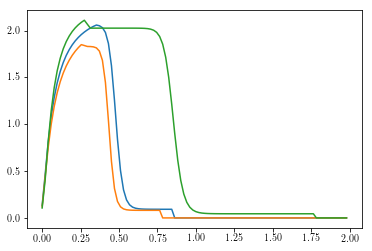

In [88]:
plt.plot(t,Pres[0])
plt.plot(t,Pres[1])
plt.plot(t,Pres[2])

Text(0.5, 0, 'Time [s]')

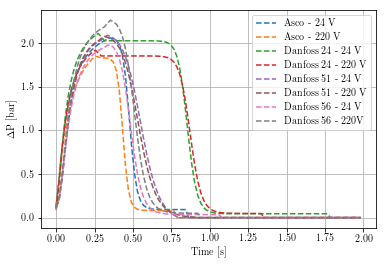

In [89]:
for j in range(8):
    plt.plot(t,Pres[j],'--',label = Valve[j])
plt.legend()
plt.grid()
plt.ylabel('$\Delta$P [bar]')
plt.xlabel('Time [s]')
#plt.savefig('Valve_open_reduced_DC.png',format = 'png', dpi=1000,bbox_inches='tight')

In [115]:
l_op_n = np.zeros(8)
l_cl_f_n = np.zeros(8)
T_num = np.zeros(8)


for j in range(8):
    k = 0
    while Pres[j][k] > 0:
        k = k+1
    print(Pres[j][k])
    i = 10
    while float(Pres[j][i])/np.max(Pres[j]) > 0.1:
        i = i+1
    l_cl_f_n[j] = i
    T_num[j] = t[i]

0.0
0.0
0.0
0.0
-0.003844975452948974
0.0
0.0
0.0


In [116]:
T_num

array([0.54901961, 0.49019608, 0.94117647, 0.98039216, 0.68627451,
       0.66666667, 0.58823529, 0.62745098])

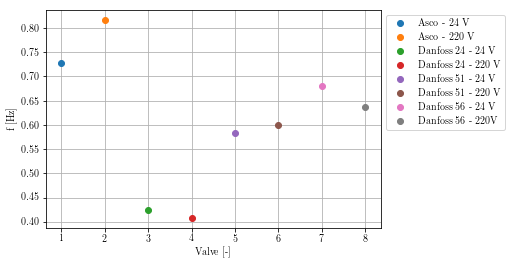

In [117]:
for i in range(8):
    plt.plot(Val[i],0.4/(T_num[i]),'o',label = Valve[i])
plt.grid()
plt.legend(bbox_to_anchor = (1,1))
plt.ylabel('f [Hz]')
plt.xlabel('Valve [-]')
plt.savefig('f_num.png',format = 'png', dpi=1000,bbox_inches='tight')

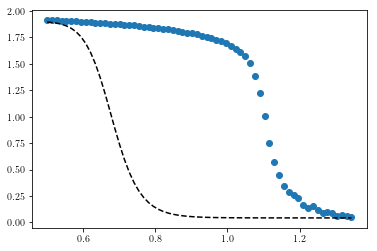

In [773]:
j = 3
plt.plot(time_cl[lim_cl:lim_cl_f],P_mean_cl[j][lim_cl:lim_cl_f],'o')
plt.plot(time_cl[lim_cl:lim_cl_f],(P_mean_cl[j][lim_cl]-P_mean_cl[j][lim_cl_f])*Close((time_cl[lim_cl:lim_cl_f]),CM[0][0],CM[0][1],CM[0][2],CM[0][3]),'k--')

In [592]:
DM = curve_fit(Open,(Time_op[i][0][0:lim_op]),P_mean_op[0:lim_op]/(P_mean_op[lim_op]-P_mean_op[0]),maxfev = 10000000)
DM[0]

IndexError: list index out of range

In [19]:
DM[0] = ([  1.04500305,   1.02215435, -14.04529138])

TypeError: 'tuple' object does not support item assignment

In [20]:
CM = curve_fit(Close,(Time_cl[i][0][lim_cl:lim_cl_f]),P_mean_cl[lim_cl:lim_cl_f]/(P_mean_cl[lim_cl]-P_mean_cl[lim_cl_f]),maxfev = 100000000)
CM[0]

array([1.00440339e+00, 2.81228111e-05, 2.73669334e-02, 7.07883594e+00])

In [21]:
DM[0] = ([  1.04500305,   1.02215435, -14.04529138])
CM[0] = ([1.00440331e+00, 2.81222682e-05, 2.73671364e-02, 7.07884854e+00])

TypeError: 'tuple' object does not support item assignment

In [22]:
Time_cl[i][0][lim_cl:lim_cl_f]

array([0.007, 0.019, 0.033, 0.047, 0.059, 0.073, 0.087, 0.099, 0.113,
       0.127, 0.139, 0.154, 0.166, 0.18 , 0.193, 0.207, 0.219, 0.233,
       0.247, 0.259, 0.273, 0.287, 0.299, 0.313, 0.327, 0.339, 0.354,
       0.366, 0.38 , 0.393, 0.407, 0.419, 0.433, 0.447, 0.459, 0.473,
       0.487, 0.499, 0.514, 0.526, 0.54 ])

In [619]:
for i in range(len(A)-1):
    for j in range(len(Pressure_cl[i][0])):
        Data.write(j,i,Pressure_cl[i][0][j])
workbook.close()

AttributeError: 'Book' object has no attribute 'close'

In [24]:
len(P_mean_cl)

112

ValueError: x and y must have same first dimension, but have shapes (17,) and (8, 38)

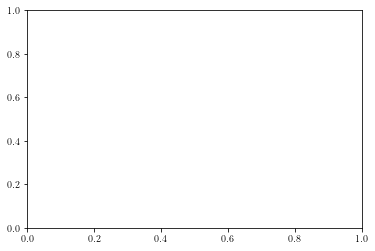

In [620]:
#for i in range(len(A)-1):
    #plt.plot(Time_op[i][0],Pressure_op[i][0],'x')
plt.plot(Time_op[i][0][0:lim_op],P_mean_op[0:lim_op],'o')
plt.plot(Time_op[i][0][0:lim_op],(P_mean_op[lim_op]-P_mean_op[0])*Open((Time_op[i][0][0:lim_op]),DM[0][0],DM[0][1],DM[0][2]),'k--')
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0])
#plt.plot(t,I,'k--')

In [28]:
P_mean_op[lim_op]/Open((Time_op[i][0][lim_op]),DM[0][0],DM[0][1],DM[0][2])/2

0.9708748564259677

In [29]:
Close((Time_cl[i][0][lim_cl:lim_cl_f]),CM[0][0],CM[0][1],CM[0][2],CM[0][3])

array([1.00440339, 1.00440336, 1.00440199, 1.00439151, 1.00432549,
       1.00405969, 1.00340821, 1.0015145 , 0.99756898, 0.98891923,
       0.9724958 , 0.9489365 , 0.90610668, 0.84307697, 0.76578294,
       0.68124439, 0.5740668 , 0.46782767, 0.38451207, 0.30118252,
       0.23424344, 0.1890611 , 0.14840074, 0.11810531, 0.09848813,
       0.08118722, 0.06837594, 0.06004391, 0.05261579, 0.04702577,
       0.04332562, 0.03996459, 0.03738181, 0.03563832, 0.03402399,
       0.03283879, 0.03188763, 0.03106746, 0.03041243, 0.02995463,
       0.02951651])

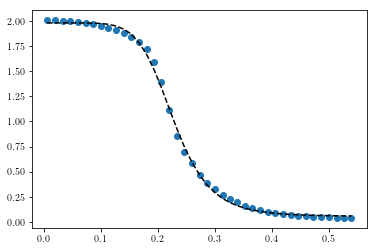

In [30]:
#for i in range(len(A)-1):
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0],'x')
plt.plot(Time_cl[i][0][lim_cl:lim_cl_f],P_mean_cl[lim_cl:lim_cl_f],'o')
plt.plot(Time_cl[i][0][lim_cl:lim_cl_f],(P_mean_cl[lim_cl]-P_mean_cl[lim_cl_f])*Close((Time_cl[i][0][lim_cl:lim_cl_f]),CM[0][0],CM[0][1],CM[0][2],CM[0][3]),'k--')
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0])
#plt.plot(t,I,'k--')

In [33]:
def Open(X,a,b,c): 
    t = X
    return(a*(1-b*np.exp(c*t)))

def Close(X,a,b,c,d): 
    t = X
    return((a*b+c*t**d)/(b+t**d))

Ope = ([  1.04500305,   1.02215435, -14.04529138])
Clo = ([1.00440331e+00, 2.81222682e-05, 2.73671364e-02, 7.07884854e+00])


def Perfil(f_v,DC,Esc):
    
    Tau = 1/f_v
    Tau_on = T*DC
    
    t_on = np.arange(0,Tau_on,Tau/101)
    t_off = np.arange(0,Tau-Tau_on,Tau/101)
    
    
    Pres = np.zeros(len(t_on)+len(t_off))
    
    for i in range(len(t_on)):
        if t_on[i] < 0.19:
            Pres[i] = Esc*Open((t_on[i]),Ope[0],Ope[1],Ope[2])
        else:
            Pres[i] = Pres[i-1]
    A = i
    
    for i in range(0,len(t_off)):
        if t_off[i] < 0.52:
            Pres[i+A] = Pres[A]*Close((t_off[i]),Clo[0],Clo[1],Clo[2],Clo[3])/1.00440331
        else:
            Pres[i+A] = 0*Pres[i+A-1]
    Pres[len(Pres)-1] = Pres[len(Pres)-2]
    
    return (Pres)

In [34]:
DC = np.arange(0.05,0.12,0.01)
for i in range(len(DC)):
    Pres = Perfil(0.5,DC[i],1)
    print(len(Pres))

102
102
102
102
102
102
102


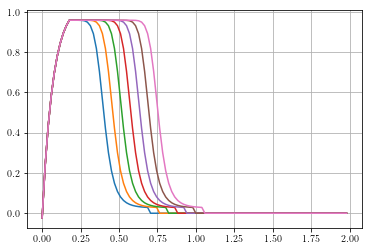

In [35]:
f_v = 0.5
t = np.arange(0,1/f_v,1/f_v/102)
DC = np.arange(0.09,0.30,0.03)
for i in range(len(DC)):
    Pres = Perfil(f_v,DC[i],1)
    plt.plot(t,Pres)
plt.grid()

In [370]:
j=0
while Pres[j+1]-Pres[j]>0.1 or Pres[j]>0.05:
    j=j+1
print(t[j],1/(4*t[j]))

0.9215686274509803 0.2712765957446809


In [42]:
t = np.arange(0,2,2/100)

ValueError: x and y must have same first dimension, but have shapes (100,) and (60,)

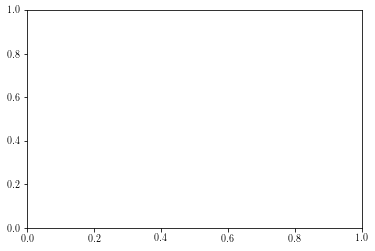

In [43]:
plt.plot(t,A)

In [231]:
j=0
while Pres[j+1]-Pres[j]>0.1 or Pres[j]>1.1:
    j=j+1
print(j)

4


In [232]:
j

4

In [229]:
f = []
DC = np.arange(0.05,0.45,0.1)
for i in range(len(DC)):
    [A] = Perfil(0.5,DC[i],1)
    print(B,1/(B/0.4))
    f.append(1/(B/0.4))
    plt.plot(A,'--',label = 'FE = ' + str(np.round(DC[i],2)))
plt.grid()
plt.legend()
#plt.ylim(1,1.2)

ValueError: too many values to unpack (expected 1)

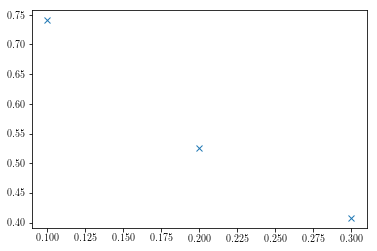

In [294]:
plt.plot(DC,f,'x')

In [140]:
erro = np.zeros([len(A),len(Pressure_op[i][0])])
erro_cl = np.zeros([len(A),len(Pressure_cl[i][0])])
for i in range(len(A)-1):
    for j in range(len(Pressure_op[i][0])):
        erro[i][j] = abs(Pressure_op[i][0][j] - Open((Time_op[i][0][j]),DM[0][0],DM[0][1],DM[0][2],DM[0][3],DM[0][4]))/Pressure_op[i][0][j]*100
    for j in range(len(Pressure_cl[i][0])):
        erro_cl[i][j] = abs(Pressure_cl[i][0][j] - Close((Time_cl[i][0][j]),CM[0][0],CM[0][1],CM[0][2],CM[0][3],CM[0][4],CM[0][5],CM[0][6]))/Pressure_cl[i][0][j]*100

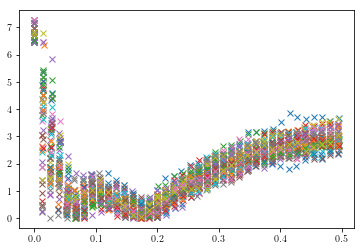

In [564]:
for i in range(len(A)-1):
    plt.plot(Time_op[i][0],erro[i],'x')

(0, 50)

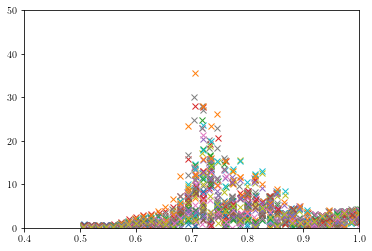

In [565]:
for i in range(len(A)-1):
    plt.plot(Time_cl[i][0],erro_cl[i],'x')
plt.xlim(0.4,1)
plt.ylim(0,50)

In [566]:
for i in range(np.int(N)-1):
    plt.plot(t[A:N_c+A],pd[N_c*i+A:N_c*(i+1)+A])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [567]:
for i in range(np.int(N)-1):
    plt.plot(t[A:N_c+A],mf[N_c*i+A:N_c*(i+1)+A])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

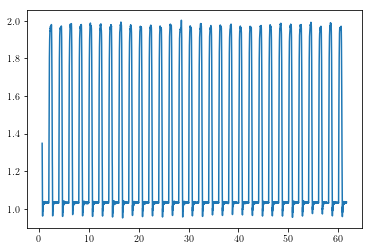

In [27]:
i = 0
plt.plot(t[i:4574],pd[i:4574])

75.0